# Plot fields on the map

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs

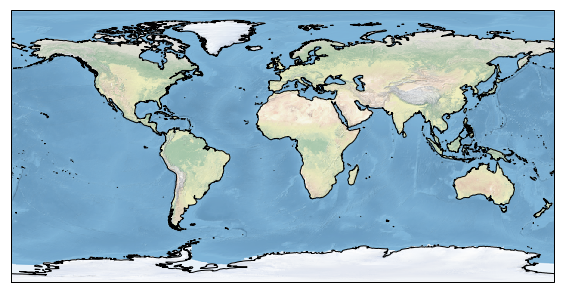

In [15]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax.coastlines('50m')
ax.stock_img()

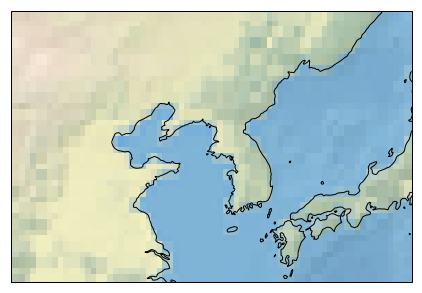

In [16]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection = ccrs.Mercator())
ax.coastlines('50m')
ax.stock_img()
ax.set_extent((110, 140, 30, 45))

In [17]:
f = Dataset('SST_Reyn_Smith.nc', 'r')
lon = f.variables['X'][:]
lat = f.variables['Y'][:]
sst = f.variables['sst'][:]
f.close()

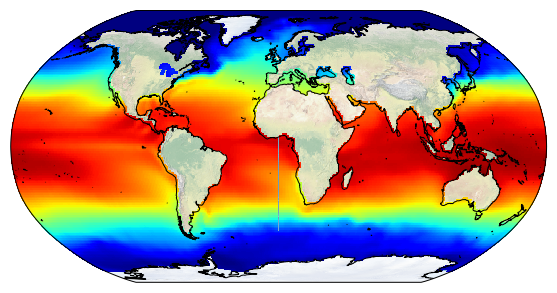

In [18]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection = ccrs.Robinson())
ax.coastlines('50m')
ax.stock_img()
# ax.set_extent((110, 140, 30, 45))
ax.pcolormesh(lon, lat, sst[0,...], cmap='jet', transform=ccrs.PlateCarree())

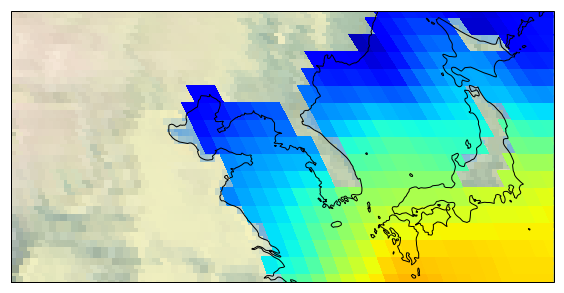

In [19]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection = ccrs.Robinson())
ax.coastlines('50m')
ax.stock_img()
ax.set_extent((110, 140, 30, 45))
ax.pcolormesh(lon, lat, sst[0,...], cmap='jet', transform=ccrs.PlateCarree())

In [20]:
f = Dataset('uwnd.mon.mean.nc', 'r')
print(f.variables.keys())
uwind = f.variables['uwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()
f = Dataset('vwnd.mon.mean.nc', 'r')
print(f.variables.keys())
vwind = f.variables['vwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()

odict_keys(['lat', 'lon', 'time', 'uwnd'])
odict_keys(['lat', 'lon', 'time', 'vwnd'])


In [21]:
intv=3

/Users/hajsong/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1744: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


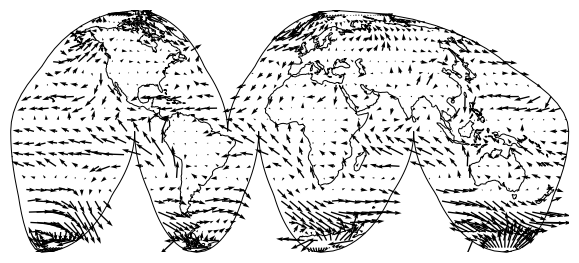

In [22]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

ax.quiver(lon[::intv], lat[::intv], 
          uwind[-1,::intv,::intv], vwind[-1,::intv,::intv],
          transform=ccrs.PlateCarree())

/Users/hajsong/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1825: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


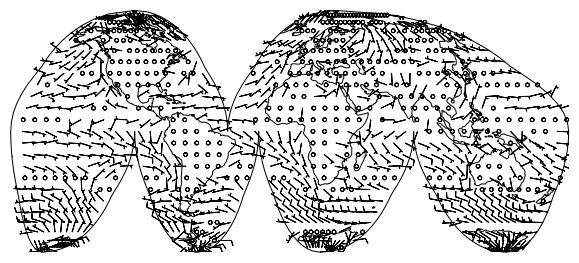

In [23]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
# ax.stock_img()
ax.barbs(lon[::intv], lat[::intv], 
         uwind[-1,::intv,::intv], vwind[-1,::intv,::intv], length=5,
         transform=ccrs.PlateCarree())